In [23]:

import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, tree, preprocessing, metrics
import sklearn.ensemble as ske
import tensorflow as tf






In [24]:
#Leer el excel
titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])


In [25]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [26]:
titanic_df['survived'].mean()

0.3819709702062643

In [27]:
titanic_df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [28]:
#Agrupar por clase y genero
class_sex_grouping = titanic_df.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

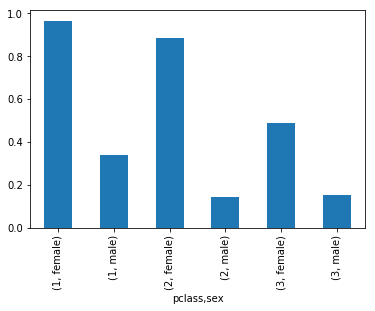

In [29]:
#Grafica de sobrevivientes segun genero y clase
class_sex_grouping['survived'].plot.bar()

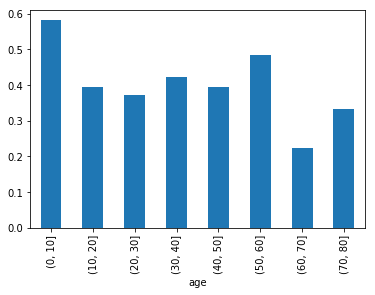

In [30]:
#Agrupar por edades, de 0 a  90 y de 10 en 10
group_by_age = pd.cut(titanic_df["age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()

#% de sobrevivientes segun edad
age_grouping['survived'].plot.bar()


In [31]:
titanic_df.count()
#Numero de datos por columna


pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [32]:
titanic_df = titanic_df.drop(['body','cabin','boat'], axis=1)
#Remover la columa de cabina, bote y body

In [33]:
titanic_df["home.dest"] = titanic_df["home.dest"].fillna("NA")
#Columa de destino se reemplaza por "NA"

In [34]:
titanic_df = titanic_df.dropna()

In [35]:
titanic_df.count()
#Mismo numero de valores en todas las columnas 

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

In [36]:

def preprocess_titanic_df(df):
    """ Elimina el nombre, ticket y destinacion. Y convierte el genero en 0 y 1"""
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df = processed_df.drop(['name','ticket','home.dest'],axis=1)
    return processed_df

In [37]:
processed_df = preprocess_titanic_df(titanic_df)

In [38]:
#X Contiene todos los valores de las filas menos survived
X = processed_df.drop(['survived'], axis=1).values
#y Contiene unicamente los datos de la columa 'Survived'
y = processed_df['survived'].values

In [39]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

NameError: name 'cross_validation' is not defined